In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
from experiment_analysis import analyze_and_plot_features

In [3]:
from data_generation.data_generator import *

In [ ]:
pre_test_value
features
in_test_value

pre_test_value = F_1(features) // F - non linear 
q_in_test_value = F_2(features)

cor(pre_test_value, in_test_value) [0, 1]


alpha = [0, 1]


in_test_value = alpha * pre_test_value + (1-alpha) * q_in_test_value






In [4]:
seed = 12

params = {
    'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],  # List of countries to be analyzed
    'platforms': ['iOS', 'Android', 'Web', 'Desktop'],  # Platforms to be included in the analysis
    'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],  # User segments to be considered
    'ab_groups': ['a1', 'a2', 'b'],  # A/B test groups
    
    'noise_level': 0.0,  # Noise level is fixed for all iterations
    'base_increase_percentage': 0.05,  # Base increase percentage is fixed for all iterations
    'num_users': 10000
}

In [5]:
generated_data = generate_synthetic_data(**params, seed=seed)

In [6]:
generated_data

,userid,country,platform,user_segment,abgroup,pre_test_value,value
0,1,IN,Web,Segment_3,a1,5.945972,6.243270
1,2,JP,iOS,Segment_3,a2,1.598529,1.678455
2,3,CA,Desktop,Segment_2,b,5.010254,5.260767
3,4,US,Android,Segment_4,a2,10.743639,11.280821
4,5,DE,Web,Segment_2,a1,7.191912,7.551508
...,...,...,...,...,...,...,...
9995,9996,FR,iOS,Segment_3,b,8.949974,9.397473
9996,9997,FR,Desktop,Segment_4,a2,5.515471,5.791245
9997,9998,AU,Desktop,Segment_2,a2,5.352360,5.619978
9998,9999,CA,iOS,Segment_3,b,4.154706,4.362441


In [80]:
np.corrcoef(generated_data['pre_test_value'], generated_data['value'])

array([[1.        , 0.80321201],
       [0.80321201, 1.        ]])

In [81]:
from catboost import CatBoostRegressor

In [82]:
model = CatBoostRegressor(iterations=20,
                                  learning_rate=1,
                                  depth=16)

In [83]:
X_train = generated_data.drop(["userid", "abgroup", "value"], axis=1)
# del X_train['pre_test_value']
X_train.head()

,country,platform,user_segment,pre_test_value
0,IN,Web,Segment_3,5.945972
1,JP,iOS,Segment_3,1.598529
2,CA,Desktop,Segment_2,5.010254
3,US,Android,Segment_4,10.743639
4,DE,Web,Segment_2,7.191912


In [84]:
y_train = generated_data["value"]
y_train.head()

0     6.243270
1     1.678455
2     5.260767
3    11.280821
4     7.551508
Name: value, dtype: float64

In [85]:
model.fit(X_train, y_train, cat_features=[0, 1, 2])

0:	learn: 1.5864349	total: 469ms	remaining: 8.91s
1:	learn: 1.1313570	total: 471ms	remaining: 4.24s
2:	learn: 0.8632248	total: 555ms	remaining: 3.14s
3:	learn: 0.8399426	total: 558ms	remaining: 2.23s
4:	learn: 0.8369122	total: 560ms	remaining: 1.68s
5:	learn: 0.8286517	total: 575ms	remaining: 1.34s
6:	learn: 0.8254028	total: 582ms	remaining: 1.08s
7:	learn: 0.8253968	total: 583ms	remaining: 874ms
8:	learn: 0.8221720	total: 584ms	remaining: 714ms
9:	learn: 0.8069040	total: 997ms	remaining: 997ms
10:	learn: 0.7987945	total: 1.45s	remaining: 1.19s
11:	learn: 0.7793865	total: 1.87s	remaining: 1.25s
12:	learn: 0.7645914	total: 2.31s	remaining: 1.24s
13:	learn: 0.7539324	total: 2.77s	remaining: 1.19s
14:	learn: 0.7495440	total: 3.22s	remaining: 1.07s
15:	learn: 0.7377632	total: 3.66s	remaining: 915ms
16:	learn: 0.7341343	total: 4.08s	remaining: 719ms
17:	learn: 0.7268972	total: 4.5s	remaining: 500ms
18:	learn: 0.7233967	total: 4.91s	remaining: 259ms
19:	learn: 0.7221248	total: 5.33s	remainin

In [86]:
y_pred = model.predict(X_train)

In [87]:
np.corrcoef(y_pred, y_train)

array([[1.        , 0.96732069],
       [0.96732069, 1.        ]])

In [88]:
0.967 ** 0.5

0.9833615815151617

In [89]:
0.8 ** 0.5

0.8944271909999159

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.0, 'base_increase_percentage': 0.17}
  0%|                                                                                                                                              | 0/5 [00:00<?, ?it/s]

0:	learn: 2.8107860	total: 69.4ms	remaining: 625ms
1:	learn: 2.7953299	total: 79ms	remaining: 316ms
2:	learn: 2.7811362	total: 94.6ms	remaining: 221ms
3:	learn: 2.7658404	total: 101ms	remaining: 151ms
4:	learn: 2.7512311	total: 109ms	remaining: 109ms
5:	learn: 2.7364165	total: 115ms	remaining: 76.6ms
6:	learn: 2.7219804	total: 120ms	remaining: 51.5ms
7:	learn: 2.7073532	total: 124ms	remaining: 31ms
8:	learn: 2.6933537	total: 128ms	remaining: 14.2ms
9:	learn: 2.6792788	total: 132ms	remaining: 0us
0:	learn: 2.6767296	total: 5.31ms	remaining: 47.8ms
1:	learn: 2.6608297	total: 8.82ms	remaining: 35.3ms
2:	learn: 2.6449183	total: 13.5ms	remaining: 31.5ms
3:	learn: 2.6295234	total: 17.5ms	remaining: 26.3ms
4:	learn: 2.6140109	total: 21.9ms	remaining: 21.9ms
5:	learn: 2.5989198	total: 25.8ms	remaining: 17.2ms
6:	learn: 2.5838491	total: 27.5ms	remaining: 11.8ms
7:	learn: 2.5693445	total: 33.9ms	remaining: 8.46ms
8:	learn: 2.5545079	total: 39.3ms	remaining: 4.36ms
9:	learn: 2.5403431	total: 43.6

 20%|██████████████████████████▊                                                                                                           | 1/5 [00:00<00:03,  1.11it/s]

0:	learn: 2.8757319	total: 4.05ms	remaining: 36.4ms
1:	learn: 2.8571647	total: 8.29ms	remaining: 33.2ms
2:	learn: 2.8394132	total: 12ms	remaining: 27.9ms
3:	learn: 2.8220233	total: 15.7ms	remaining: 23.6ms
4:	learn: 2.8045433	total: 19.8ms	remaining: 19.8ms
5:	learn: 2.7874031	total: 24ms	remaining: 16ms
6:	learn: 2.7711885	total: 27.6ms	remaining: 11.8ms
7:	learn: 2.7542822	total: 31.9ms	remaining: 7.96ms
8:	learn: 2.7378998	total: 35.8ms	remaining: 3.98ms
9:	learn: 2.7216895	total: 39.6ms	remaining: 0us
0:	learn: 2.8298461	total: 5.14ms	remaining: 46.2ms
1:	learn: 2.8113676	total: 9.76ms	remaining: 39ms
2:	learn: 2.7929833	total: 15.3ms	remaining: 35.6ms
3:	learn: 2.7749235	total: 21.1ms	remaining: 31.7ms
4:	learn: 2.7567587	total: 26.8ms	remaining: 26.8ms
5:	learn: 2.7395712	total: 32.2ms	remaining: 21.4ms
6:	learn: 2.7224566	total: 36.3ms	remaining: 15.5ms
7:	learn: 2.7055312	total: 40.6ms	remaining: 10.1ms
8:	learn: 2.6886463	total: 44.9ms	remaining: 4.98ms
9:	learn: 2.6715552	tot

 40%|█████████████████████████████████████████████████████▌                                                                                | 2/5 [00:02<00:03,  1.04s/it]

0:	learn: 2.8373478	total: 4.44ms	remaining: 39.9ms
1:	learn: 2.8195712	total: 9.25ms	remaining: 37ms
2:	learn: 2.8019320	total: 13.3ms	remaining: 31.1ms
3:	learn: 2.7847508	total: 17.5ms	remaining: 26.2ms
4:	learn: 2.7672761	total: 22ms	remaining: 22ms
5:	learn: 2.7506723	total: 28ms	remaining: 18.6ms
6:	learn: 2.7341304	total: 32.3ms	remaining: 13.9ms
7:	learn: 2.7176027	total: 36.9ms	remaining: 9.23ms
8:	learn: 2.7012789	total: 40.8ms	remaining: 4.53ms
9:	learn: 2.6849776	total: 45.4ms	remaining: 0us
0:	learn: 2.8431053	total: 5.27ms	remaining: 47.4ms
1:	learn: 2.8247111	total: 9.92ms	remaining: 39.7ms
2:	learn: 2.8063567	total: 14.8ms	remaining: 34.6ms
3:	learn: 2.7885386	total: 19.5ms	remaining: 29.2ms
4:	learn: 2.7707748	total: 24.3ms	remaining: 24.3ms
5:	learn: 2.7530006	total: 28.9ms	remaining: 19.2ms
6:	learn: 2.7356795	total: 33.3ms	remaining: 14.3ms
7:	learn: 2.7185066	total: 38.3ms	remaining: 9.58ms
8:	learn: 2.7018281	total: 43.3ms	remaining: 4.81ms
9:	learn: 2.6851515	tot

 60%|████████████████████████████████████████████████████████████████████████████████▍                                                     | 3/5 [00:03<00:02,  1.22s/it]

0:	learn: 2.7790482	total: 5.21ms	remaining: 46.9ms
1:	learn: 2.7609044	total: 9.82ms	remaining: 39.3ms
2:	learn: 2.7428239	total: 14.6ms	remaining: 34ms
3:	learn: 2.7252207	total: 18.9ms	remaining: 28.3ms
4:	learn: 2.7078601	total: 23.5ms	remaining: 23.5ms
5:	learn: 2.6903810	total: 27.7ms	remaining: 18.5ms
6:	learn: 2.6733209	total: 32.4ms	remaining: 13.9ms
7:	learn: 2.6564311	total: 36.3ms	remaining: 9.09ms
8:	learn: 2.6400959	total: 40.2ms	remaining: 4.47ms
9:	learn: 2.6242340	total: 44.2ms	remaining: 0us
0:	learn: 2.8255795	total: 8.29ms	remaining: 74.6ms
1:	learn: 2.8069690	total: 15.7ms	remaining: 62.9ms
2:	learn: 2.7887848	total: 22.7ms	remaining: 53ms
3:	learn: 2.7706458	total: 30.3ms	remaining: 45.5ms
4:	learn: 2.7527859	total: 36.1ms	remaining: 36.1ms
5:	learn: 2.7351138	total: 42.2ms	remaining: 28.1ms
6:	learn: 2.7176864	total: 48.4ms	remaining: 20.7ms
7:	learn: 2.7003116	total: 54.5ms	remaining: 13.6ms
8:	learn: 2.6830095	total: 59.9ms	remaining: 6.66ms
9:	learn: 2.6661764

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 4/5 [00:05<00:01,  1.48s/it]

0:	learn: 2.7988609	total: 7.5ms	remaining: 67.5ms
1:	learn: 2.7809959	total: 14.2ms	remaining: 56.7ms
2:	learn: 2.7636946	total: 21ms	remaining: 49ms
3:	learn: 2.7464710	total: 27.2ms	remaining: 40.8ms
4:	learn: 2.7292997	total: 32.6ms	remaining: 32.6ms
5:	learn: 2.7125162	total: 39ms	remaining: 26ms
6:	learn: 2.6958390	total: 45.6ms	remaining: 19.5ms
7:	learn: 2.6793763	total: 51.9ms	remaining: 13ms
8:	learn: 2.6630112	total: 57.4ms	remaining: 6.37ms
9:	learn: 2.6471601	total: 62.7ms	remaining: 0us
0:	learn: 2.7733790	total: 7.33ms	remaining: 65.9ms
1:	learn: 2.7555208	total: 13.9ms	remaining: 55.6ms
2:	learn: 2.7379342	total: 20.3ms	remaining: 47.3ms
3:	learn: 2.7202150	total: 26.2ms	remaining: 39.3ms
4:	learn: 2.7032968	total: 33.7ms	remaining: 33.7ms
5:	learn: 2.6864197	total: 40.9ms	remaining: 27.3ms
6:	learn: 2.6697415	total: 46.6ms	remaining: 20ms
7:	learn: 2.6530727	total: 52.7ms	remaining: 13.2ms
8:	learn: 2.6372356	total: 59.6ms	remaining: 6.62ms
9:	learn: 2.6209281	total: 6

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.48s/it]

0:	learn: 2.8166716	total: 7.88ms	remaining: 71ms
1:	learn: 2.7984227	total: 15.3ms	remaining: 61.2ms
2:	learn: 2.7806724	total: 22.1ms	remaining: 51.6ms
3:	learn: 2.7625023	total: 28.7ms	remaining: 43.1ms
4:	learn: 2.7450562	total: 34.8ms	remaining: 34.8ms
5:	learn: 2.7277394	total: 40.7ms	remaining: 27.1ms
6:	learn: 2.7104160	total: 46.5ms	remaining: 19.9ms
7:	learn: 2.6932621	total: 54.2ms	remaining: 13.5ms
8:	learn: 2.6766406	total: 60.2ms	remaining: 6.69ms
9:	learn: 2.6598940	total: 65.9ms	remaining: 0us


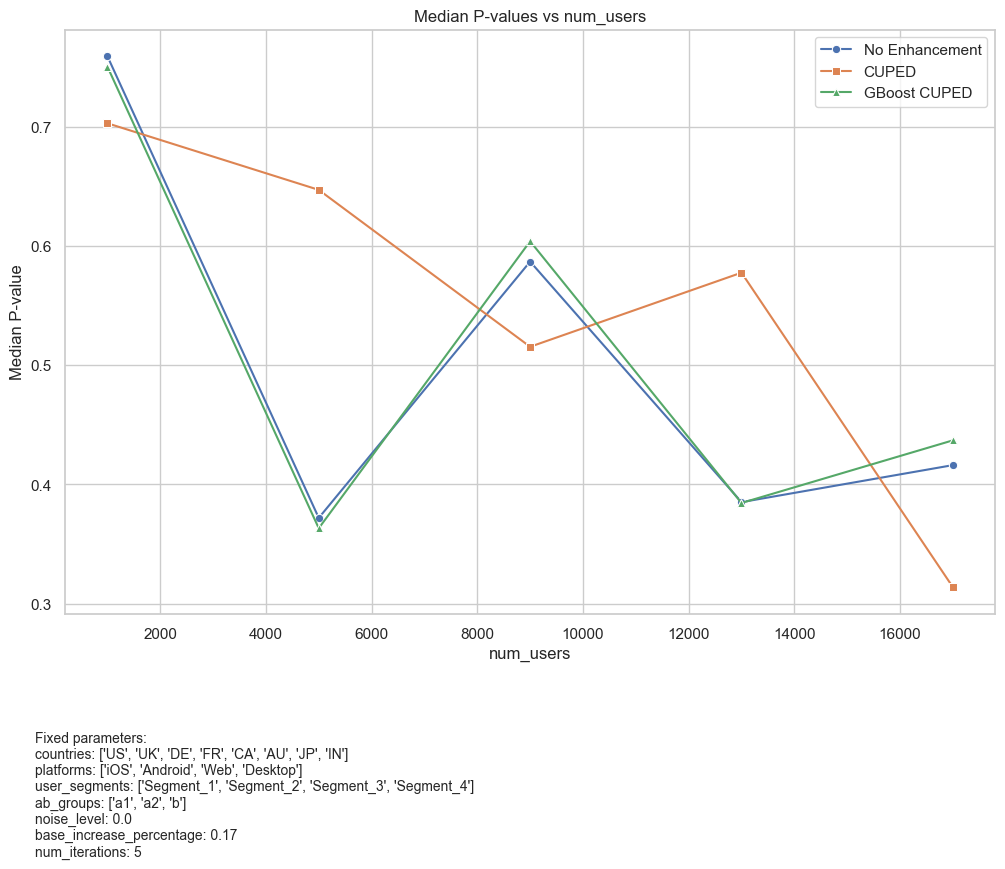

['plots/2024-07-20_23-43-01-102168_UTC_num_users_77a60597.png']

In [3]:
# Define fixed parameters that do not change during the analysis


# Define parameters with ranges
varying_params = {
    'base_increase_percentage': np.arange(0.17, 0.18, 0.01),  # Range of base increase percentages to be analyzed
}

# Define parameters with ranges to be used as the X-axis
x_params = {
    'num_users': np.arange(1000, 20000, 4000)  # Range of user numbers to be used on the X-axis
}

# Call the function to analyze and plot for all selected features
analyze_and_plot_features(
    fixed_params, 
    varying_params, 
    x_params, 
    num_iterations=5,  # Number of iterations to perform for each analysis
    # num_iterations=50,  # Original higher number of iterations, can be used for more thorough analysis
)


INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.0)}
100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


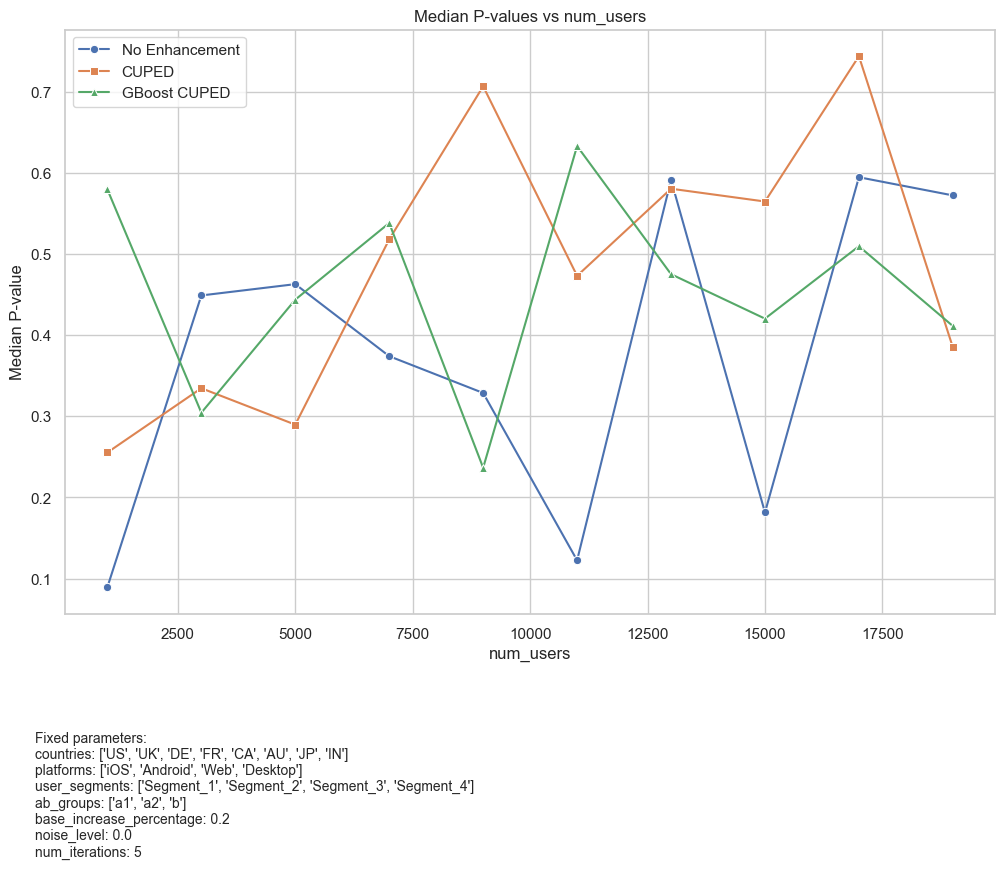

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.1)}
100%|██████████| 10/10 [00:17<00:00,  1.75s/it]


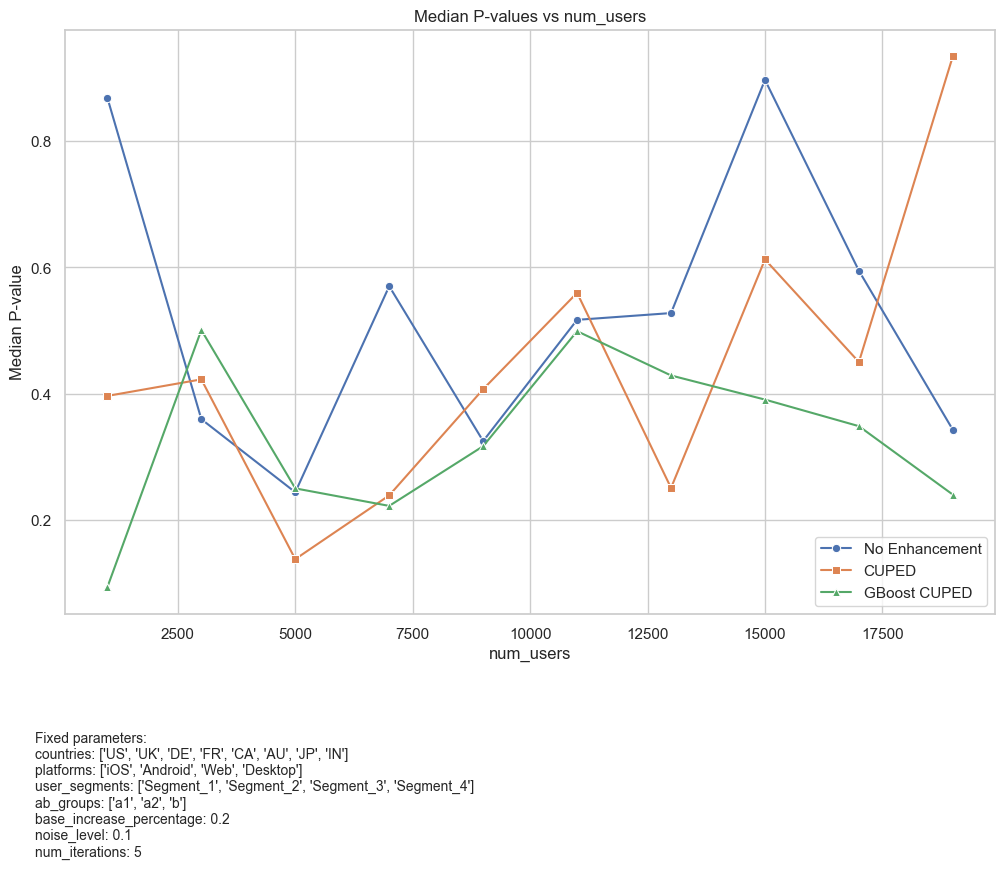

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.2)}
100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


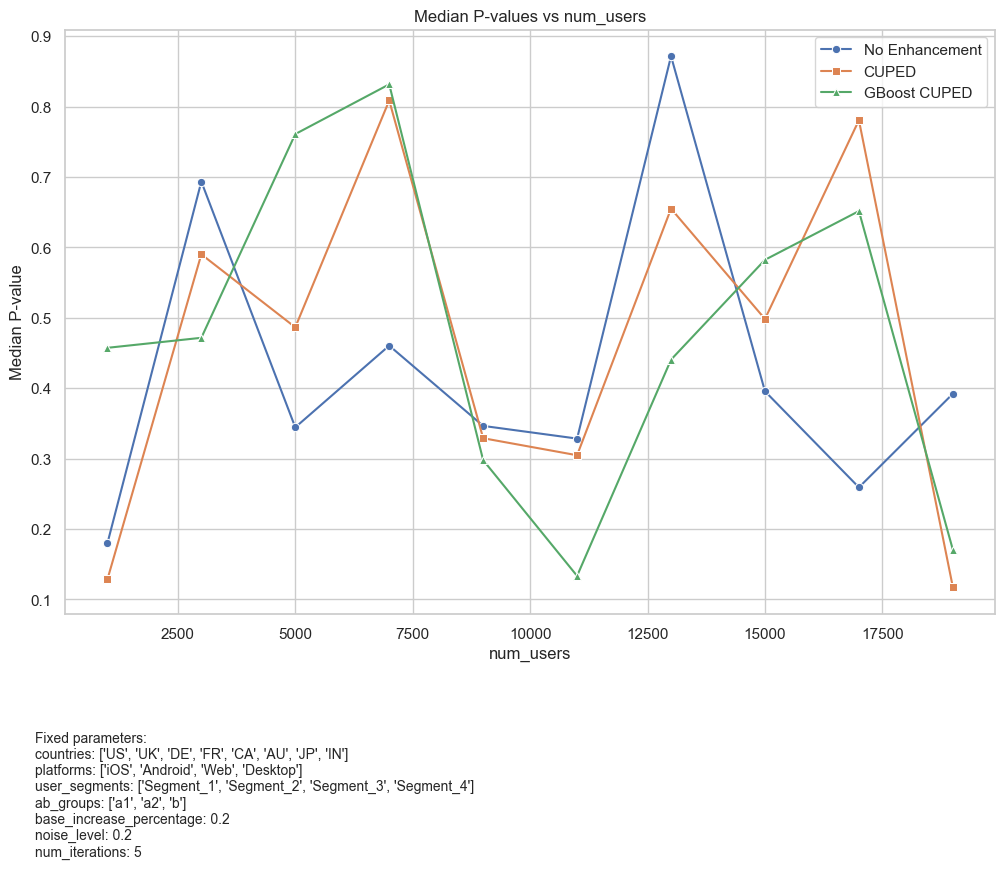

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.30000000000000004)}
100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


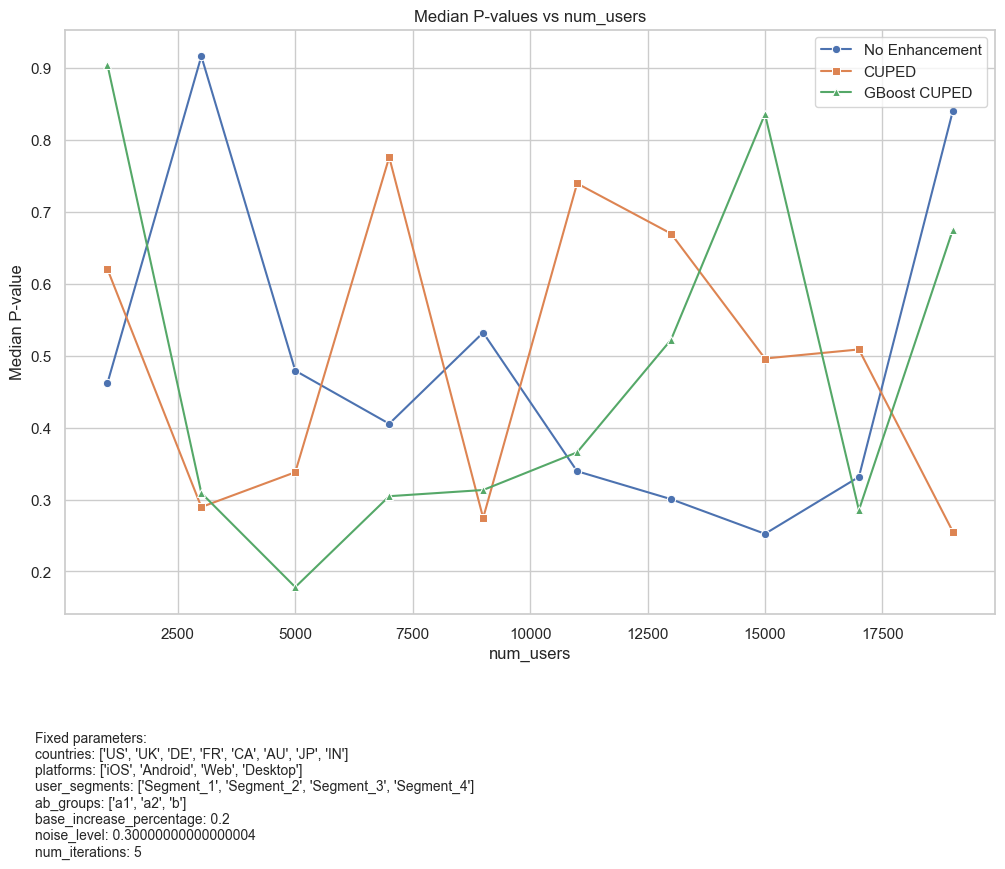

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.4)}
100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


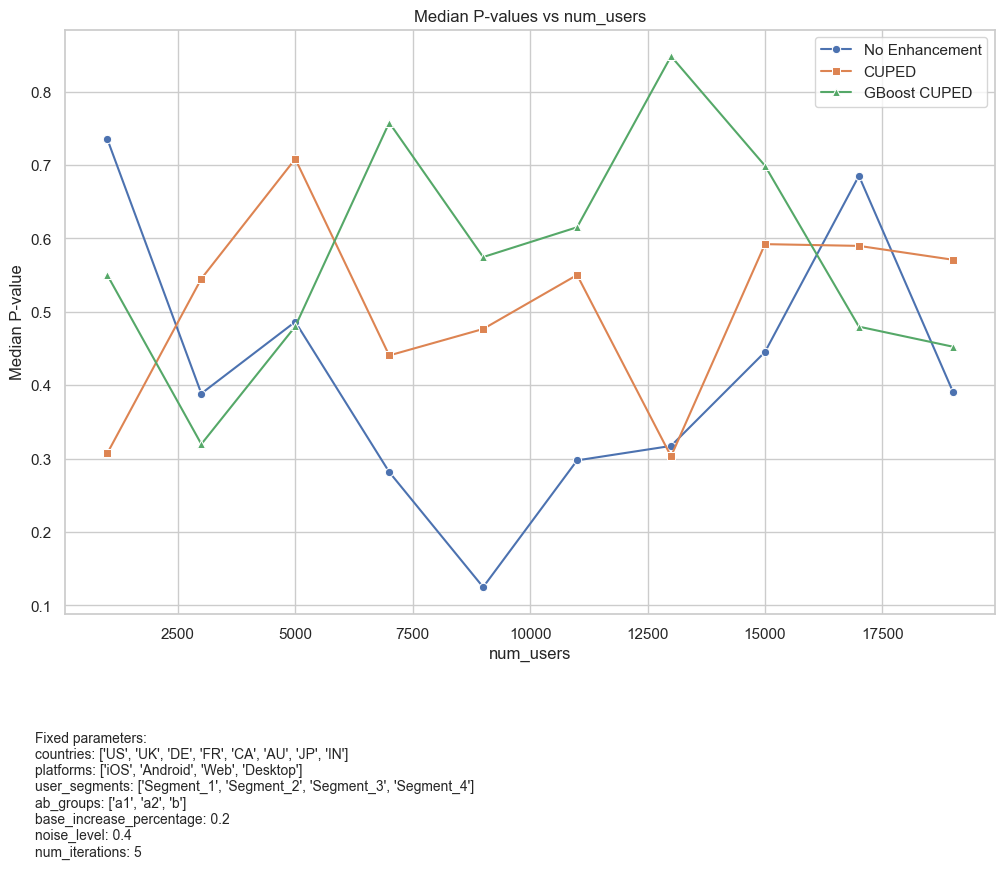

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.5)}
100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


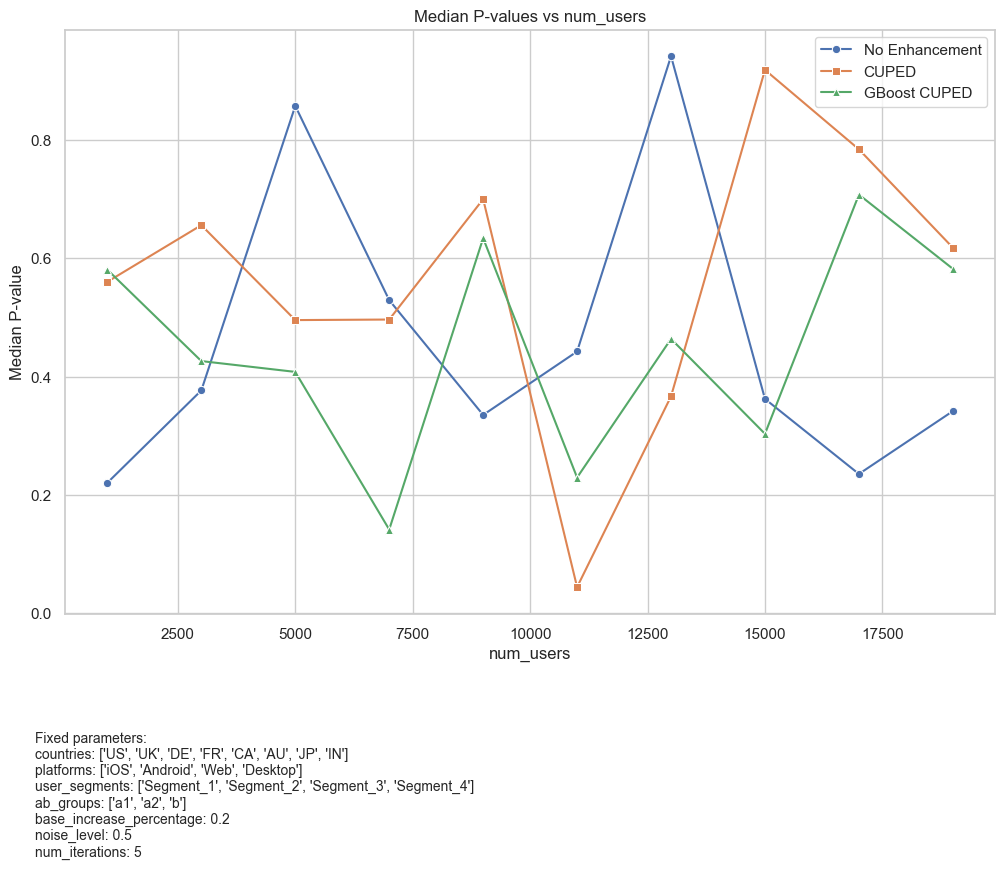

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.6000000000000001)}
100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


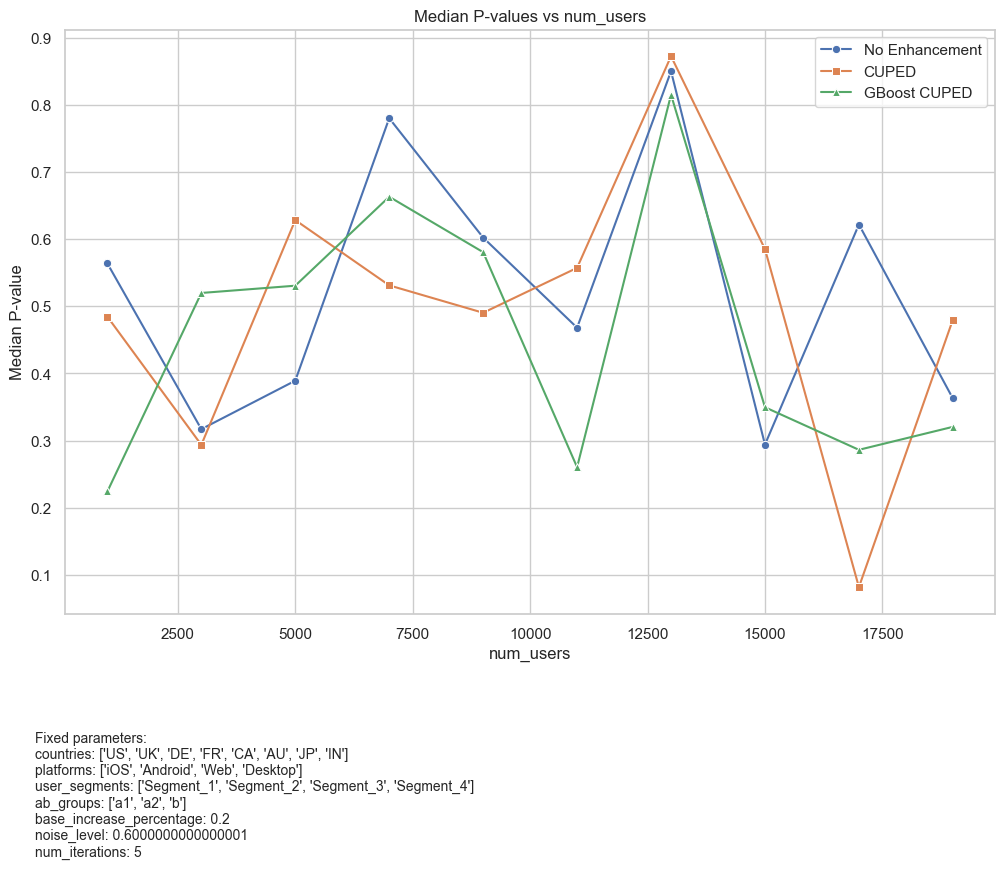

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.7000000000000001)}
100%|██████████| 10/10 [00:18<00:00,  1.89s/it]


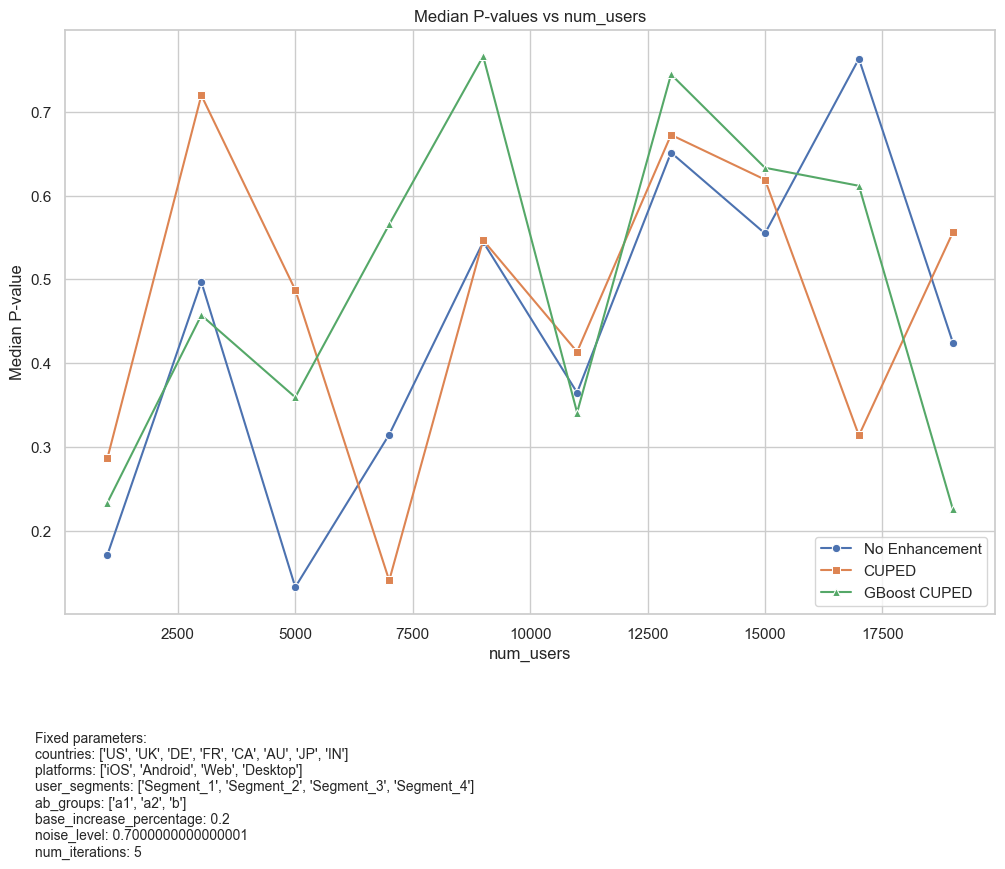

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.8)}
100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


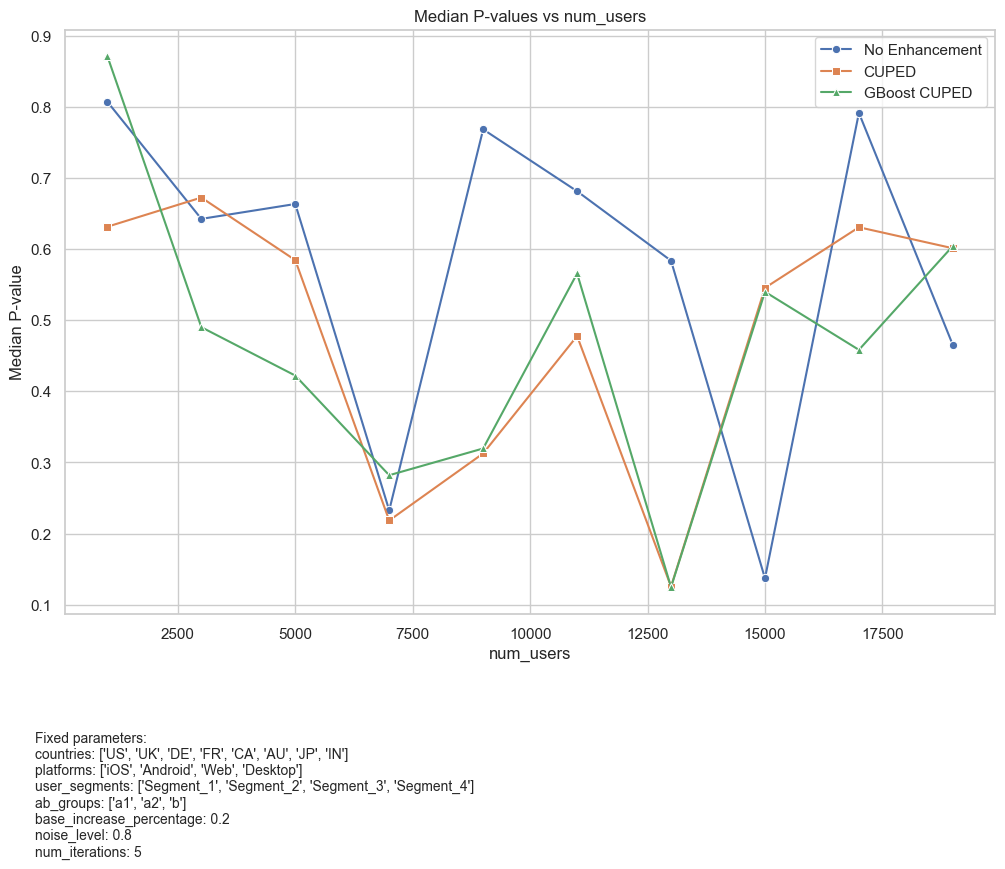

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(0.9)}
100%|██████████| 10/10 [00:18<00:00,  1.80s/it]


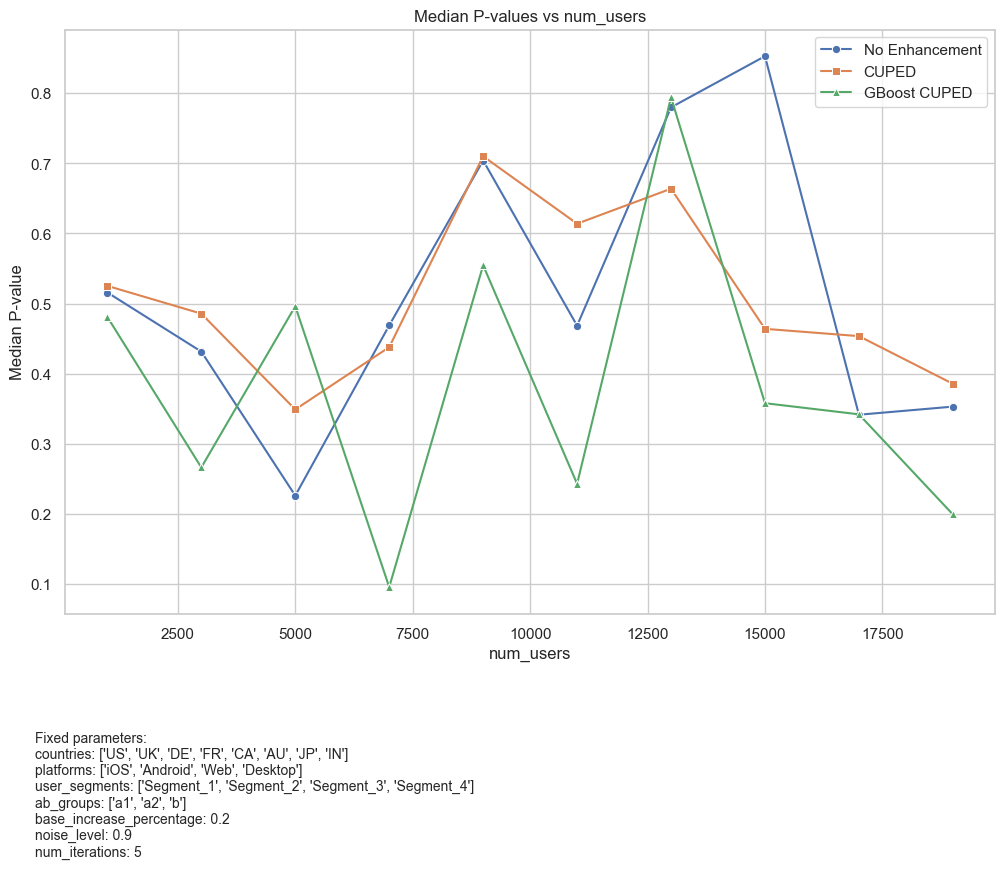

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'base_increase_percentage': 0.2, 'noise_level': np.float64(1.0)}
100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


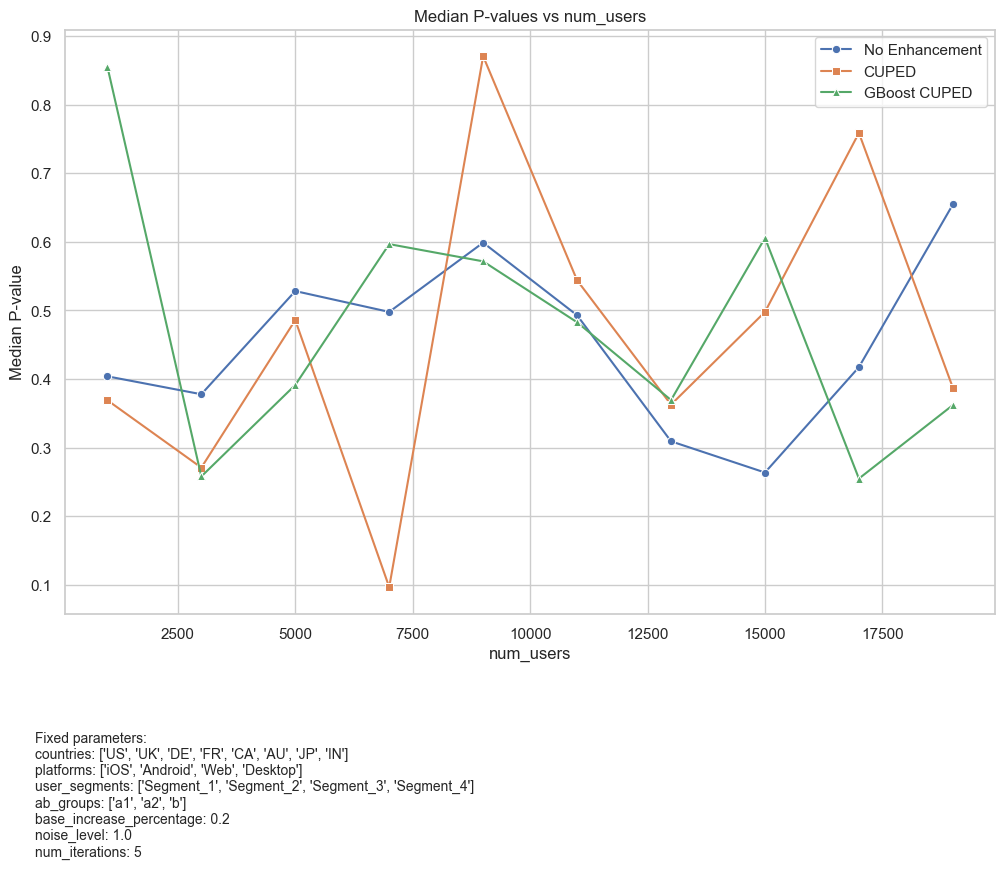

['plots/2024-07-19_20-00-47-568772_UTC_num_users_802fe9e1.png',
 'plots/2024-07-19_20-01-05-636495_UTC_num_users_a3ac5d0d.png',
 'plots/2024-07-19_20-01-25-752658_UTC_num_users_8502620f.png',
 'plots/2024-07-19_20-01-45-719507_UTC_num_users_acffa227.png',
 'plots/2024-07-19_20-02-05-435526_UTC_num_users_99a1e27c.png',
 'plots/2024-07-19_20-02-25-240586_UTC_num_users_962cfaba.png',
 'plots/2024-07-19_20-02-45-301793_UTC_num_users_b560bd0b.png',
 'plots/2024-07-19_20-03-04-697233_UTC_num_users_53163acf.png',
 'plots/2024-07-19_20-03-23-122884_UTC_num_users_eb4040df.png',
 'plots/2024-07-19_20-03-41-677539_UTC_num_users_fb0bcd60.png',
 'plots/2024-07-19_20-04-00-305744_UTC_num_users_6d7cf2bb.png']

In [5]:
import numpy as np

# Define fixed parameters that do not change during the analysis
fixed_params = {
    'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],  # List of countries to be analyzed
    'platforms': ['iOS', 'Android', 'Web', 'Desktop'],  # Platforms to be included in the analysis
    'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],  # User segments to be considered
    'ab_groups': ['a1', 'a2', 'b'],  # A/B test groups
    
    # 'noise_level': 0.5,  # Noise level is fixed for all iterations
    'base_increase_percentage': 0.2,  # Base increase percentage is fixed for all iterations
}

# Define parameters with ranges
varying_params = {
    'noise_level': np.arange(0, 1.1, 0.1),  # Noise level is fixed for all iterations
}

# Define parameters with ranges to be used as the X-axis
x_params = {
    'num_users': np.arange(1000, 20000, 2000)  # Range of user numbers to be used on the X-axis
}

# Call the function to analyze and plot for all selected features
analyze_and_plot_features(
    fixed_params, 
    varying_params, 
    x_params, 
    num_iterations=5,  # Number of iterations to perform for each analysis
    # num_iterations=50,  # Original higher number of iterations, can be used for more thorough analysis
)
